### Необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams

In [142]:
rcParams['figure.figsize'] = 11,7

In [143]:
df = pd.read_csv('bond_girls.csv')

In [144]:
print(df.shape)

(71, 11)


In [145]:
df.head()

,bond_girl_name,actress_age,film_title,film_release_year,bond_actor,bond_actor_age,director_name,box_office_actual_$,box_office_adjusted_2005_$,budget_actual_$,budget_adjusted_2005_$
0,Ursula Andress,26,Dr. No,1962,Sean Connery,32,Terence Young,59.5,448.8,1.1,7.0
1,Zena Marshall,36,Dr. No,1962,Sean Connery,32,Terence Young,59.5,448.8,1.1,7.0
2,Eunice Gayson,35,From Russia with Love,1963,Sean Connery,33,Terence Young,78.9,543.8,2.0,12.6
3,Daniela Bianchi,21,From Russia with Love,1963,Sean Connery,33,Terence Young,78.9,543.8,2.0,12.6
4,Martine Beswick,24,Thunderball,1965,Sean Connery,35,Terence Young,141.2,848.1,6.8,41.9


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bond_girl_name              71 non-null     object 
 1   actress_age                 71 non-null     int64  
 2   film_title                  71 non-null     object 
 3   film_release_year           71 non-null     int64  
 4   bond_actor                  71 non-null     object 
 5   bond_actor_age              71 non-null     int64  
 6   director_name               71 non-null     object 
 7   box_office_actual_$         71 non-null     float64
 8   box_office_adjusted_2005_$  71 non-null     float64
 9   budget_actual_$             71 non-null     object 
 10  budget_adjusted_2005_$      71 non-null     object 
dtypes: float64(2), int64(3), object(6)
memory usage: 6.2+ KB


In [147]:
avg_age = df[['film_release_year', 'actress_age']] \
    .groupby(['film_release_year'], as_index=False)['actress_age'].mean().astype(int)

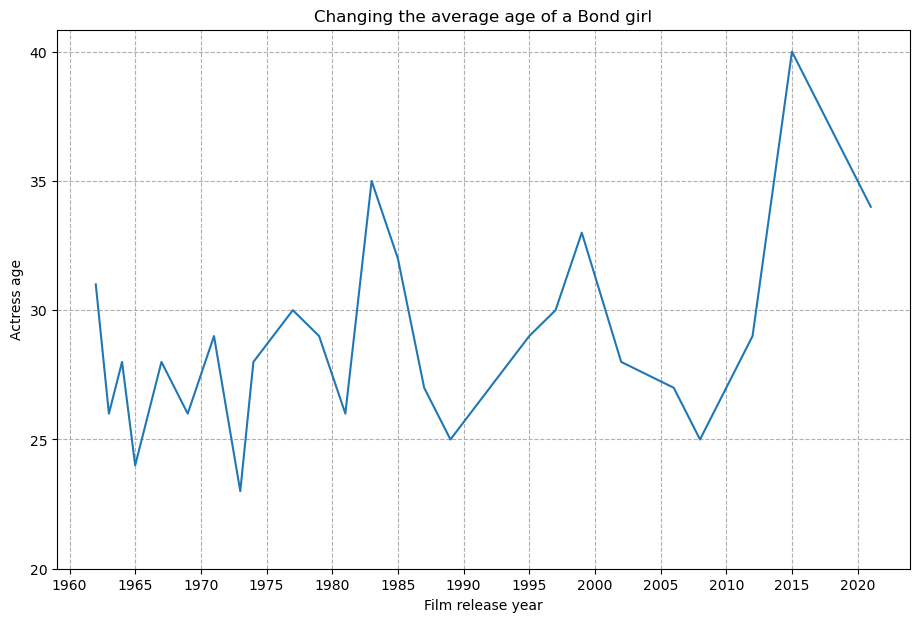

In [148]:
plt.plot(avg_age['film_release_year'], avg_age['actress_age'])
plt.xticks(range(1960, 2022, 5))
plt.yticks(range(20, 45, 5))
plt.grid(linestyle='--')
plt.title('Changing the average age of a Bond girl')
plt.xlabel('Film release year')
plt.ylabel('Actress age')

plt.show()

*Можно предположить, что средний возраст девушки Бонда укладывается в диапазон 25-30 лет.  
С редкими исключениями вроде Моники Беллуччи.*

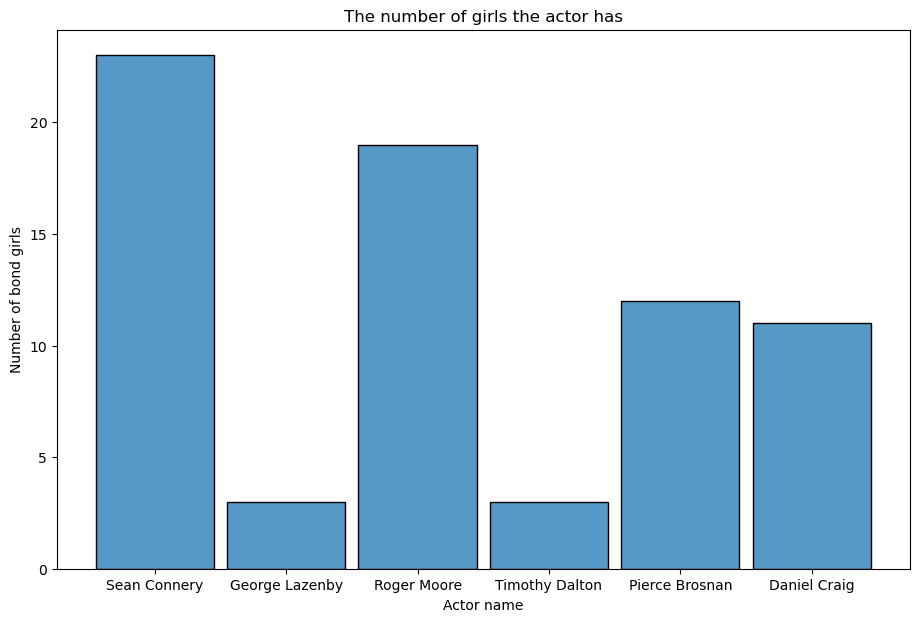

In [150]:
sns.histplot(df['bond_actor'], shrink=0.9)
plt.title('The number of girls the actor has')
plt.xlabel('Actor name')
plt.ylabel('Number of bond girls')
plt.show()

*Здесь особо гипотез не построить - только порадоваться за Шона Коннери...*

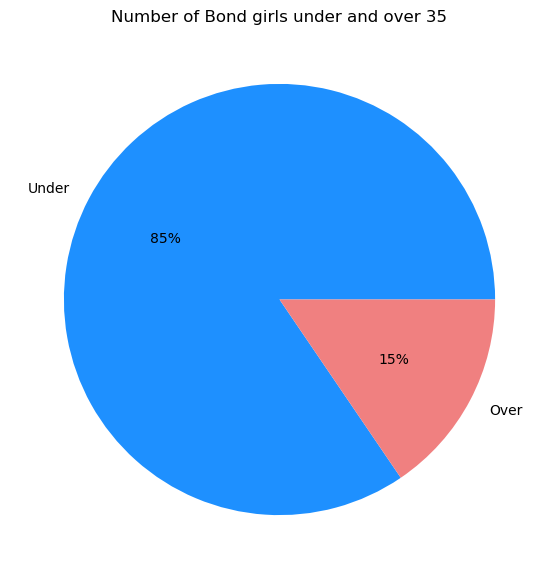

In [151]:
plt.pie([len(df['bond_girl_name'][df['actress_age'] < 35]), 
        len(df['bond_girl_name'][df['actress_age'] >= 35]) ], 
        labels=['Under', 'Over'], autopct='%1.0f%%', colors=['dodgerblue', 'lightcoral'])
plt.title('Number of Bond girls under and over 35')
plt.show()

*Предположим, что актрисе в возрасте до 35 легче стать девушкой Бонда.*

In [152]:
bond_girl_min_age = df.groupby(['film_title', 'box_office_adjusted_2005_$'], as_index=False). \
    agg(actress_min_age=('actress_age', 'min'))
bond_girl_min_age

,film_title,box_office_adjusted_2005_$,actress_min_age
0,A View to a Kill,275.2,29
1,Casino Royale,589.4,26
2,Diamonds Are Forever,442.5,24
3,Die Another Day,465.4,23
4,Dr. No,448.8,26
5,For Your Eyes Only,449.4,23
6,From Russia with Love,543.8,21
7,GoldenEye,518.5,25
8,Goldfinger,820.4,21
9,Licence to Kill,250.9,22


In [153]:
box_office_relative_actress_age = bond_girl_min_age.pivot_table(
        index='actress_min_age',
        columns='film_title',
        values='box_office_adjusted_2005_$').fillna(0)

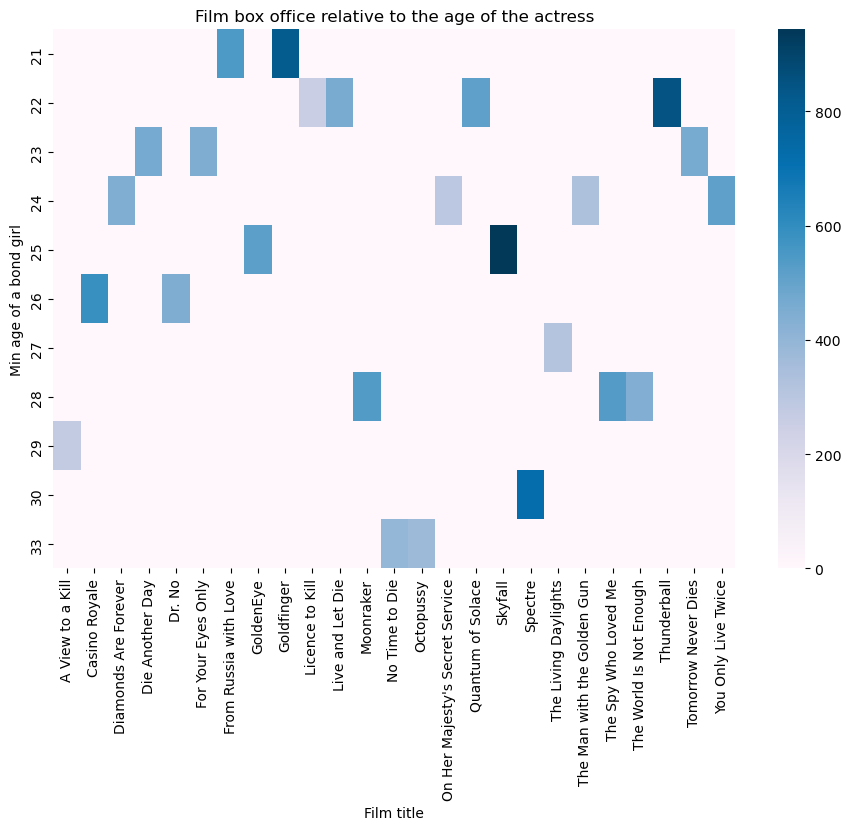

In [154]:
sns.heatmap(box_office_relative_actress_age , cmap='PuBu')
plt.title('Film box office relative to the age of the actress')
plt.xlabel('Film title')
plt.ylabel('Min age of a bond girl')
plt.show()

*Осмелюсь предположить, что фильмы с молодыми актрисами собирают в прокате больше.*

На этом этапе заподозрил, что выбрал не совсем удачный dataset.  
Понимаю, что тепловая карта должна выглядеть несколько иначе, но в целях тренировки решил выполнить и данную визуализацию.  
Подскажите, пожалуйста, а какие ещё можно было бы реализовать отношения и в каком виде в рамках данного материала?